### Objectives 
* Basics of Decision Tree
* Introduction to Decision boundry
* Decision Tree for Classification 
* Introdution to Entropy 

In [1]:
from sklearn.datasets import make_blobs  

In [2]:
make_blobs

<function sklearn.datasets.samples_generator.make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)>

In [3]:
X,Y = make_blobs(n_features = 2,n_samples = 1000,cluster_std = .8,centers = 4,random_state = 6)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

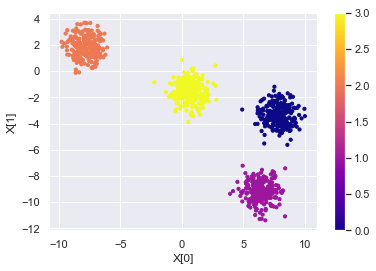

In [5]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y,cmap = 'plasma')
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()

### Fundamentals of decision tree
* Supervised Algorithm - For Classification & Regressoin
* DT algorithm generates a decision tree for prediction
* Leafs are the decisions 
* DT dont work directly on contious data into categorical data
* DT creation can be based on entropy or gini (TBD tom)

In [6]:
X[:5]

array([[ 9.25784958, -2.82526517],
       [ 0.96889603, -1.63014501],
       [-8.2630645 ,  0.90588073],
       [-7.85737757,  2.17665695],
       [-8.28000833,  1.98407695]])

In [7]:
Y[:5]

array([0, 3, 2, 2, 2])

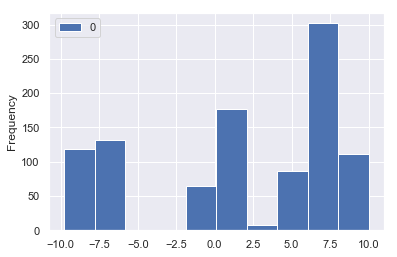

In [8]:
pd.DataFrame(X[:,0]).plot.hist()

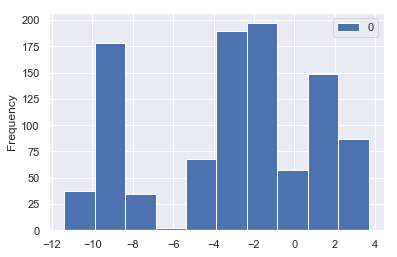

In [9]:
pd.DataFrame(X[:,1]).plot.hist()

In [10]:
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1]})

In [12]:
df['Target'] = Y

In [13]:
df.head()

,X1,X2,Target
0,9.257850,-2.825265,0
1,0.968896,-1.630145,3
2,-8.263065,0.905881,2
3,-7.857378,2.176657,2
4,-8.280008,1.984077,2


### converting X1 col to categorical column 

In [16]:
def f(v):
    if v < -7:
        return 'one'
    elif v < 2.5:
        return 'two'
    else :
        return 'three'
df['X1_cat'] = df.X1.map(f)

In [22]:
def f(v):
    if v < -7:
        return 'one'
    elif v < 2.5:
        return 'two'
    else :
        return 'three'
df['X2_cat'] = df.X2.map(f)

In [24]:
df.sample(5)

,X1,X2,Target,X1_cat,X2_cat
779,7.408026,-4.187220,0,three,two
360,6.685496,-10.177657,1,three,one
113,8.773070,-4.223067,0,three,two
129,-7.335132,1.092513,2,one,two
633,-7.889222,0.576092,2,one,two


In [25]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [26]:
dt =DecisionTreeClassifier(criterion = 'entropy')

In [28]:
dt.fit(df[['X1','X2']],df.Target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
# export_graphviz('dt','dt_tree')

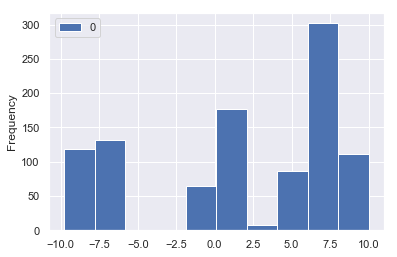

In [30]:
pd.DataFrame(X[:,0]).plot.hist()

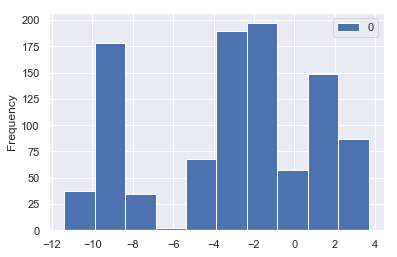

In [31]:
pd.DataFrame(X[:,1]).plot.hist()

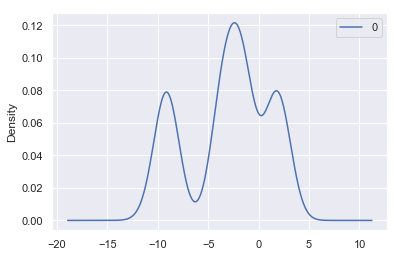

In [34]:
pd.DataFrame(X[:,1]).plot.kde()

In [35]:
import numpy as np
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))


In [36]:
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])

In [37]:
outcome

array([2, 2, 2, ..., 0, 0, 0])

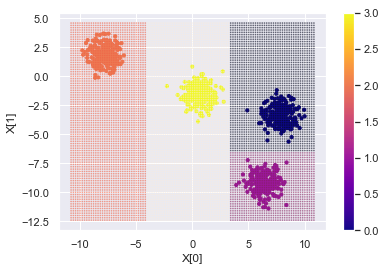

In [39]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y,cmap = 'plasma')
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
#0 - purple
#1 - blue
#2 - Green
#3 - Yellow
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,alpha=.5,s=.5,)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knc = KNeighborsClassifier()

In [42]:
knc.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
outcome = knc.predict(np.c_[xx.ravel(), yy.ravel()])

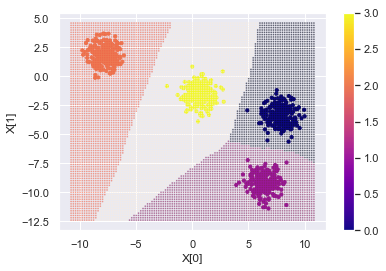

In [45]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y,cmap="plasma")
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()

plt.scatter(xx.ravel(),yy.ravel(),c=outcome,alpha=.5,s=.5)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

In [48]:
lr.fit(X,Y)

C:\Users\saket\Anaconda333\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saket\Anaconda333\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
outcome = lr.predict(np.c_[xx.ravel(), yy.ravel()])

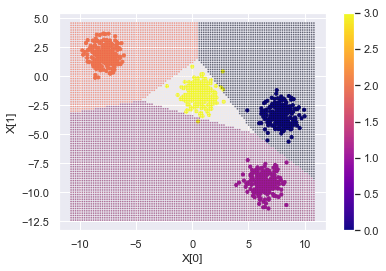

In [52]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y,cmap='plasma')
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,alpha=.5,s=.5)


In [53]:
from sklearn.datasets import load_digits

In [55]:
digits = load_digits()

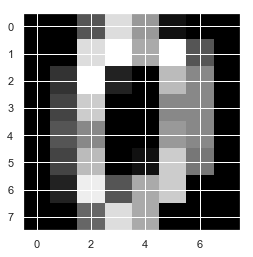

In [56]:
plt.imshow(digits.images[0],cmap = 'gray')

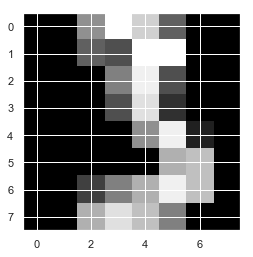

In [58]:
plt.imshow(digits.images[45],cmap='gray')

In [59]:
digits.target[45]

3

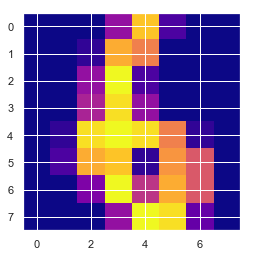

In [60]:
plt.imshow(digits.images[34],cmap = 'plasma')

In [61]:
digits.target[34]

6

* training data for scikit is always in vector format & not matrix format 
* digits.images is in matrix format 
* digits.data is the row version of matrix,this scikit understands 
* each pixel is one feature 

In [62]:
digits.data[34]

array([ 0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,  1., 13., 11.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        6., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 16., 15., 11.,  1.,
        0.,  0.,  2., 13., 14.,  1., 12.,  9.,  0.,  0.,  0.,  4., 16.,
        7., 13.,  9.,  0.,  0.,  0.,  0.,  5., 16., 15.,  3.,  0.])

In [63]:
digits.data.shape

(1797, 64)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
trainX,testX,trainY,testY = train_test_split(digits.data,digits.target)

In [66]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

###### export_graphviz(dt,'file_name')
* To see the generated tree http://www.webgraphviz.com/

In [67]:
dt.score(testX,testY)

0.8666666666666667

### Another Example

In [68]:
tennis_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/tennis.csv.txt')

In [69]:
tennis_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
oe = OrdinalEncoder()

In [72]:
feature = oe.fit_transform(tennis_data.drop(columns=['play']))

In [73]:
dt = DecisionTreeClassifier(criterion='entropy')

In [74]:
dt.fit(feature,tennis_data.play)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
oe.categories_

[array(['overcast', 'rainy', 'sunny'], dtype=object),
 array(['cool', 'hot', 'mild'], dtype=object),
 array(['high', 'normal'], dtype=object),
 array([False, True], dtype=object)]

In [76]:
feature

array([[2., 1., 0., 0.],
       [2., 1., 0., 1.],
       [0., 1., 0., 0.],
       [1., 2., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [0., 0., 1., 1.],
       [2., 2., 0., 0.],
       [2., 0., 1., 0.],
       [1., 2., 1., 0.],
       [2., 2., 1., 1.],
       [0., 2., 0., 1.],
       [0., 1., 1., 0.],
       [1., 2., 0., 1.]])

In [78]:
#export_graphviz(dt,'dt3.tree',feature_names=['outlook','temp','humidity','windy'])

In [79]:
tennis_data.play

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

In [80]:
dt.predict([[1,0,1,0]])

array(['yes'], dtype=object)

In [81]:
dt.predict([[1,0,1,0]])

array(['yes'], dtype=object)

### Note:
* Decision Tree are highly interpretable,what this means is - you can explain anybody why your model took the decision 
* this is known as model interpretation 